# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Data Description

- User_ID :- User Id
- Product_ID :- Product Id
- Gender :- Sex of User
- Age :- Age in Bins
- Occupation :- Occupation of User
- City_Category :- Category of the City (A, B, C)
- Stay_In_Current_City_Years :- Numbers of years stay in current city
- Marital_Status :- Marital Status of User
- Product_Category_1 :- Product Category
- Product_Category_2 :- Product Category
- Product_Category_3 :- Product Category
- Purchase :- Purchase Amount (Target Variable)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading training dataset

df1 = pd.read_csv('train.csv')

In [3]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df1.shape

(550068, 12)

In [5]:
# loading the test dataset

df2 = pd.read_csv('test.csv')

In [6]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df2.shape

(233599, 11)

In [8]:
# Merging both training and test dataset

df = df1.append(df2, sort = False)

In [9]:
df.shape

(783667, 12)

In [10]:
# looking at first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
# dropping unnecessary fields from the dataset

df.drop(['User_ID'], axis = 1, inplace = True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# Converting categorical data into integer ones by using mapping functions

df['Gender'] = df['Gender'].map({'F': 0, 'M':1})
df['Gender'].head(10) # checking the column after transformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [15]:
# visualizing the unique values of the age field

df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
# converting categorical data of age variable into integers using mapping functions

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.City_Category.unique() # checking unique values in City_Category column

array(['A', 'C', 'B'], dtype=object)

In [19]:
# Creating Dummies for categorical data

city = pd.get_dummies(df['City_Category'], drop_first = True)

In [20]:
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [21]:
# concatinating dummy variables with original dataset

df = pd.concat([df, city], axis = 1)

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
df.tail() # visualizing last 5 rows

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN,1,0


In [24]:
# checking for null values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Visualizing unique values of fields which contains NAN values for different columns.

In [25]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [26]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### value counts of each variable

In [28]:
df.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [29]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [30]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

### finding mode of the fields

In [31]:
df.Product_Category_1.mode()

0    5
dtype: int64

In [32]:
df.Product_Category_2.mode()

0    8.0
dtype: float64

In [33]:
df.Product_Category_3.mode()

0    16.0
dtype: float64

In [34]:
# Renaming the columns

df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

In [35]:
# looking at the columns after renaming columns 

df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### Filling the null values with the mode

In [36]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [37]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [38]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [39]:
# filling the nan values with the mean of purchase column

df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [40]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [41]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [42]:
# dropping the City_Category column

df.drop('City_Category', axis = 1, inplace = True)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [44]:
df['Stay_In_Current_City_Years'].unique() # checking unique values of Stay_In_Current_City_Years column

array(['2', '4+', '3', '1', '0'], dtype=object)

In [45]:
# replacing '+' value by ' ' by using str method
df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.str.replace('+', ' ')

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [48]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(np.int64)
df['B'] = df['B'].astype(np.int64)
df['C'] = df['C'].astype(np.int64)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


### Creating a check point

In [50]:
df_i = df.copy()

# Dropping the unnecessary field
df_i.drop('Product_ID', axis = 1, inplace = True)

In [51]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


## Visualizing Age vs Purchased

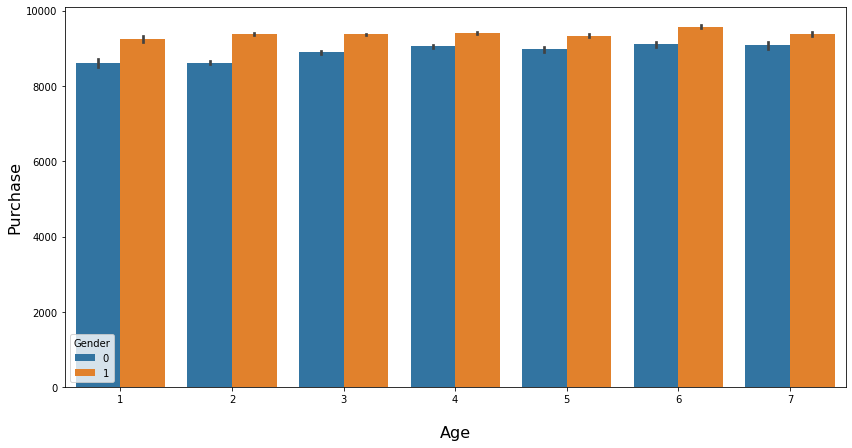

In [52]:
plt.figure(figsize = (14, 7))
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df_i)
plt.xlabel('\nAge', size = 16)
plt.ylabel('Purchase', size = 16)

plt.show()

**Purchasing of goods of each range of age is almost is equal. We can conclude that the percentage of purchasing goods of men over women is higher.**

## Visualizing Occupation Vs Purchased 

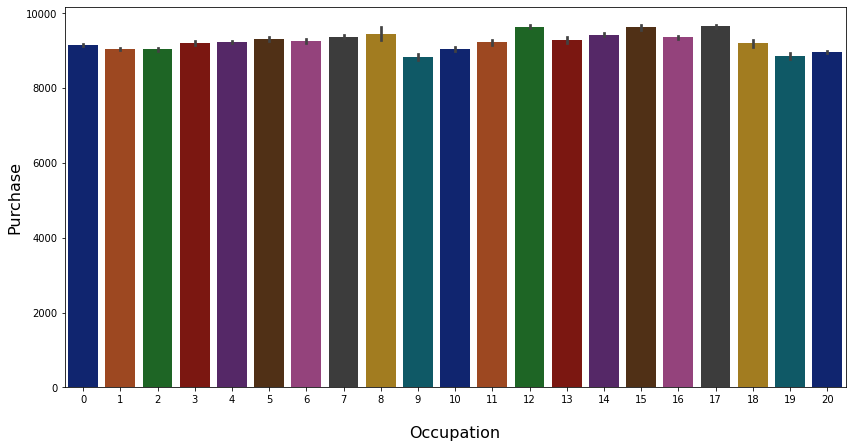

In [53]:
fig, ax = plt.subplots(figsize = (14, 7))
sns.barplot('Occupation', 'Purchase', data = df_i, ax = ax, palette = 'dark')
ax.set_xlabel('\nOccupation', size = 16)
ax.set_ylabel('Purchase', size = 16)

plt.show()

**All the occupation contributes almost same in purchasing rates.**

## Visualizing Stay_In_Current_City Vs Purchased

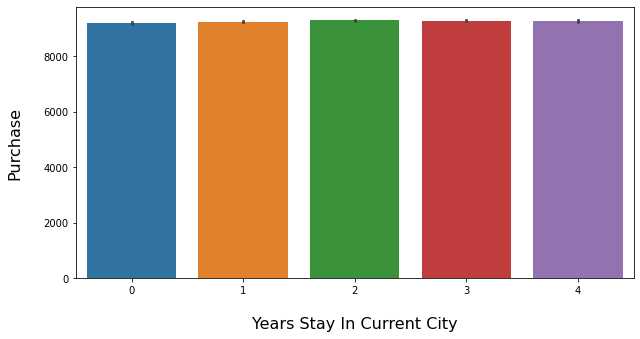

In [54]:
plt.figure(figsize = (10, 5))
sns.barplot('Stay_In_Current_City_Years', 'Purchase', data = df_i)
plt.xlabel('\nYears Stay In Current City', size = 16)
plt.ylabel('Purchase\n', size = 16)

plt.show()

**Purchases won't affect alot that how many years you live in a city.**

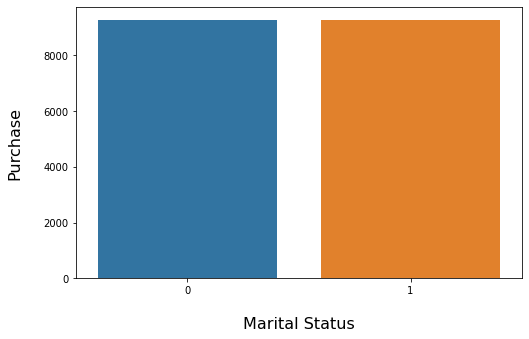

In [55]:
plt.figure(figsize = (8, 5))
sns.barplot('Marital_Status', 'Purchase', data = df_i)
plt.xlabel('\nMarital Status', size = 16)
plt.ylabel('Purchase\n', size = 16)

plt.show()

**Purchase is not affected by marital status.**

## Visualizing Product_category1 Vs Purchased

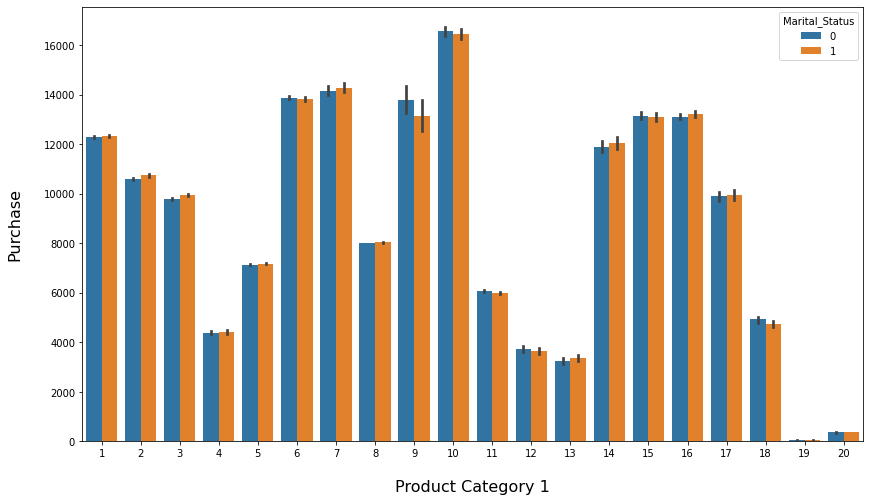

In [56]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.barplot('cat1', 'Purchase', hue = 'Marital_Status', data = df_i, ax =ax)
ax.set_xlabel('\nProduct Category 1', size = 16)
ax.set_ylabel('Purchase\n', size = 16)

plt.show()

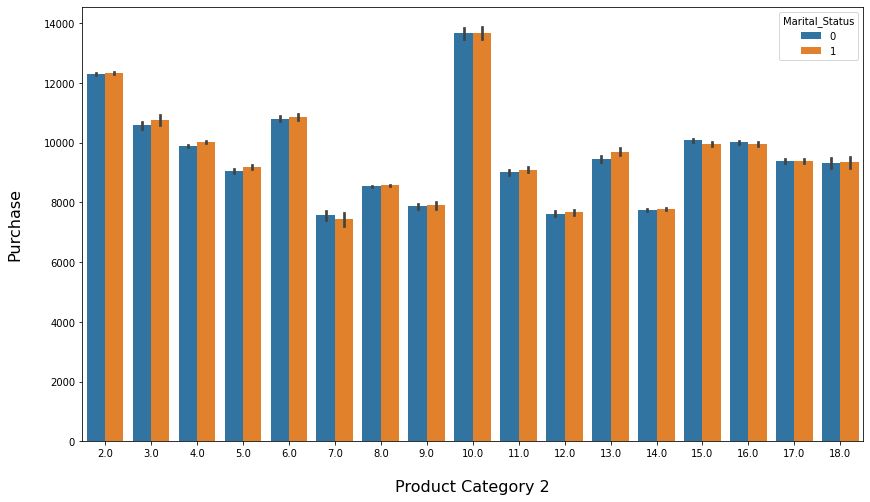

In [57]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.barplot('cat2', 'Purchase', hue = 'Marital_Status', data = df_i, ax =ax)
ax.set_xlabel('\nProduct Category 2', size = 16)
ax.set_ylabel('Purchase\n', size = 16)

plt.show()

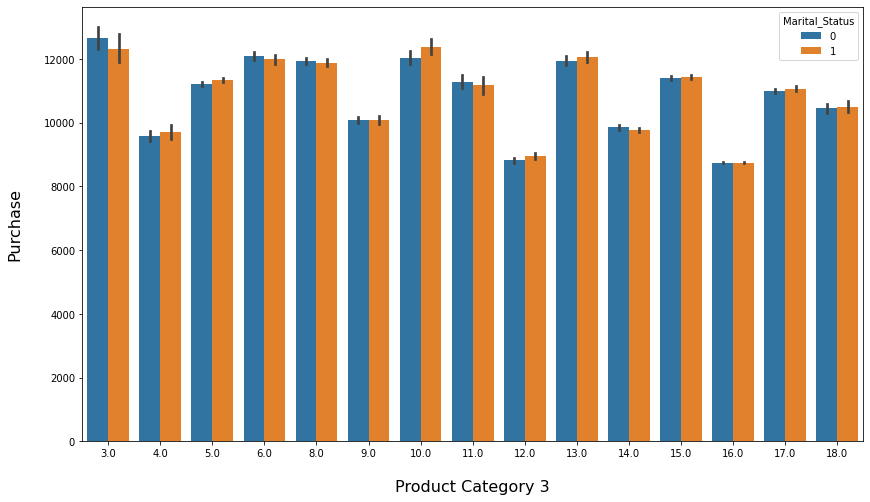

In [58]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.barplot('cat3', 'Purchase', hue = 'Marital_Status', data = df_i, ax =ax)
ax.set_xlabel('\nProduct Category 3', size = 16)
ax.set_ylabel('Purchase\n', size = 16)

plt.show()

**We can conclude that there is no such variation in the percentage of the purchasing whether the person is married or not. Product Category 3 is much more purchased by people than Product Category 2 and Product Category 1.**  

In [59]:
X = df_i.drop('Purchase', axis = 1) # dropping the purchase column to create features
y = df_i.Purchase # selecting the purchase column to create labels

In [60]:
X.shape

(783667, 10)

In [61]:
y.shape

(783667,)

In [62]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [63]:
X_train.shape, y_train.shape

((587750, 10), (587750,))

In [64]:
X_test.shape, y_test.shape

((195917, 10), (195917,))

In [65]:
# Feature scaling so that data in all the columns are of same scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train

array([[-1.74312706, -0.367473  , -1.23849235, ...,  0.36903161,
        -0.85208974, -0.67148659],
       [ 0.57368165, -0.367473  ,  0.60093949, ...,  0.36903161,
         1.17358531, -0.67148659],
       [ 0.57368165,  0.37152412, -1.23849235, ...,  0.36903161,
         1.17358531, -0.67148659],
       ...,
       [-1.74312706,  1.11052124,  1.06079745, ...,  0.36903161,
        -0.85208974,  1.48923303],
       [ 0.57368165, -1.10647012, -0.62534841, ...,  0.36903161,
        -0.85208974, -0.67148659],
       [ 0.57368165,  2.58851548,  1.36736942, ...,  0.36903161,
        -0.85208974,  1.48923303]])

In [67]:
X_test

array([[ 0.57368165, -0.367473  , -1.23849235, ...,  0.36903161,
        -0.85208974,  1.48923303],
       [-1.74312706, -0.367473  , -0.77863439, ...,  0.36903161,
        -0.85208974, -0.67148659],
       [-1.74312706,  1.11052124, -0.16549045, ...,  0.36903161,
        -0.85208974,  1.48923303],
       ...,
       [ 0.57368165, -1.10647012, -0.62534841, ...,  0.36903161,
         1.17358531, -0.67148659],
       [ 0.57368165, -0.367473  ,  0.60093949, ...,  0.36903161,
        -0.85208974, -0.67148659],
       [-1.74312706,  0.37152412,  1.82722738, ...,  0.36903161,
        -0.85208974,  1.48923303]])

**Now we have features for both training and testing.The data can be converted to a DataFrame, if necessary , and can be fed to a machine learning model.**